### Test notebook

Tests the function `evaluate_matching_with_rotation` in `relfm/utils/matching.py`.

In [1]:
%load_ext autoreload
%autoreload 2

In [112]:
from os.path import join, exists, isdir
from glob import glob
from typing import List, Union

import torch
import cv2
import numpy as np
from PIL import Image

from relfm.utils.visualize import (
    show_grid_of_images,
    show_keypoint_matches,
    show_single_image,
    draw_kps_on_image,
    COLORS,
)
from relfm.utils.matching import evaluate_matching_with_rotation, analyze_result
from relfm.utils.visualize import get_concat_h

### Load sample data

In [6]:
DATA_ROOT = "/home/lcur1325/datasets/hpatches-sequences-release/"

In [7]:
category = "v_churchill"
category_folder = join(DATA_ROOT, category)

image_paths = sorted(glob(join(category_folder, "*.ppm")))
homography_paths = sorted(glob(join(category_folder, "H_*_*")))

In [8]:
img1_path = image_paths[0]
img2_path = image_paths[3]

H_path = homography_paths[3 - 1]

In [9]:
img1_path, img2_path, H_path

('/home/lcur1325/datasets/hpatches-sequences-release/v_churchill/1.ppm',
 '/home/lcur1325/datasets/hpatches-sequences-release/v_churchill/4.ppm',
 '/home/lcur1325/datasets/hpatches-sequences-release/v_churchill/H_1_4')

In [10]:
# load images
img1, img2 = Image.open(img1_path), Image.open(img2_path)

# load homography: transform from image 1 to image 2
H = np.loadtxt(H_path)

In [11]:
width, height = img1.size

In [74]:
# define some random predictions: keypoints and descriptors

num_kps = 10
desc_dim = 128
kp1 = np.stack(
    [
        np.random.uniform(0., width, num_kps),
        np.random.uniform(0., height, num_kps),
    ]
).T
des1 = np.random.randn(num_kps, desc_dim)

kp2 = np.stack(
    [
        np.random.uniform(0., width, num_kps),
        np.random.uniform(0., height, num_kps),
    ]
).T
des2 = np.random.randn(num_kps, desc_dim)


In [75]:
kp1.shape, kp2.shape, des1.shape, des2.shape

((10, 2), (10, 2), (10, 128), (10, 128))

In [76]:
def show_images_with_keypoints(images: list, kps: list, radius=15, color=(0, 220, 220), figsize=(10, 8)):
    assert len(images) == len(kps)
    
    # generate
    images_with_kps = []
    for i in range(len(images)):
        img_with_kps = draw_kps_on_image(images[i], kps[i], radius=radius, color=color, return_as="PIL")
        images_with_kps.append(img_with_kps)
    
    # show
    show_grid_of_images(images_with_kps, n_cols=len(images), figsize=figsize)

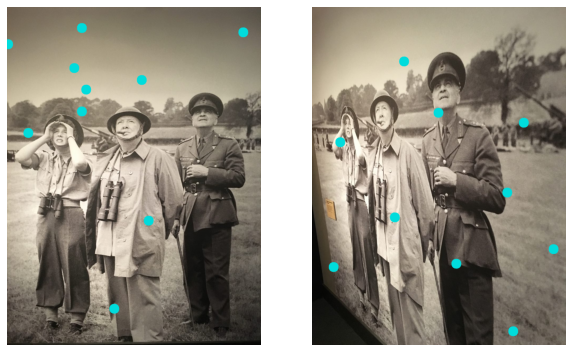

In [77]:
show_images_with_keypoints([img1, img2], [kp1, kp2])

In [118]:
result = evaluate_matching_with_rotation(
    kp1=kp1,
    des1=des1,
    kp2=kp2,
    des2=des2,
    H=H,
    width=width,
    height=height,
    rotation=0,
    return_metadata=True,
    threshold=300.,
)

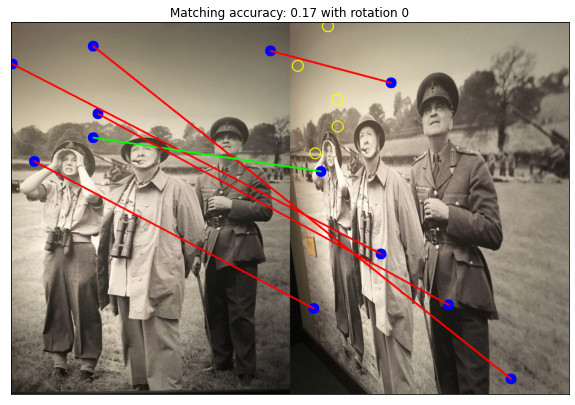

In [119]:
analyze_result(img1, img2, result)